In [ ]:
!pip install tensorflow
!pip install tensorflow-text


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 97.9 MB/s eta 0:00:00


In [ ]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 22.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=14fefcd52a32543e86a47ae1ee887f821002ab2b9a20e33df40d86c2ba6499cf
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji


In [ ]:
pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import re
import string
import nltk
import matplotlib.pyplot as plt
import plotly.express as px
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import emoji
import contractions
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text
import gensim
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Flatten
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc
from keras.layers import SpatialDropout1D
from keras.callbacks import EarlyStopping

## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
import gensim
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop

In [ ]:
# Load the dataset
train_data = pd.read_csv('/content/sample_data/categorized_new_tweets.csv')
test_data= pd.read_csv('/content/sample_data/Unseen 5pillarsEarthUK.csv',encoding='cp1252', quotechar='"', delimiter=',')

In [ ]:

# Count the number of tweets in each category
category_counts = train_data['category_name'].value_counts()

# Create a bar plot using plotly
fig = px.bar(category_counts, x=category_counts.index, y=category_counts.values,
             labels={'x': 'Category Names', 'y': 'Number of Tweets'},
             title='Number of Tweets in Each Category',
             width=400, height=600)
# Show the plot
fig.show()

In [ ]:
# download stopwords and lemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

# get stop words
stop_words = set(stopwords.words('english'))
# create lemmatizer
lemmatizer = WordNetLemmatizer()


# define regular expression patterns for removing URLs, HTML tags, and emojis
url_pattern = re.compile(r'http\S+|www\S+')
html_pattern = re.compile('<.*?>')
#emoji_pattern = re.compile('[\U0001f600-\U0001f650]')
emoji_pattern = re.compile(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF]+')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "they would have"
}

In [ ]:
# function to clean text and lemmatize text
def clean_tokenize_lemmatize(text):
     # remove URLs
    text = re.sub(url_pattern, '', text)
    
    # remove HTML tags
    text = re.sub(html_pattern, '', text)
    
     # remove emojis using regex
    text = re.sub(emoji_pattern, r'', text)
    
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # remove digits
    text = re.sub(r'\d+', '', text)
    
     # expand contractions
    text = contractions.fix(text)

    # convert text to lowercase
    text = text.lower()
    
    # remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # remove stop words, tokenize, and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return tokens
    
    return text

In [ ]:
# apply clean_text function to train data
train_data['text'] = train_data['full_text'].apply(clean_tokenize_lemmatize)

# apply clean_text function to test data
test_data['text'] = test_data['full_text'].apply(clean_tokenize_lemmatize)

In [ ]:
# Prepare the data
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(train_data['text'].values)
X = tokenizer.texts_to_sequences(train_data['text'].values)
X = pad_sequences(X, maxlen=100)
y = pd.get_dummies(train_data['category_name']).values



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/GloVe')

In [ ]:
path = "/content/drive/MyDrive/GloVe/glove.twitter.27B.100d.txt"
with open(path, encoding='utf-8') as f:
    embeddings_index = {}
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [ ]:
# Get the word index from the tokenizer
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# Create an embedding matrix
num_words = min(len(word_index), len(embeddings_index))
embedding_matrix = np.zeros((num_words, 100))
for word, i in word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

Found 21380 unique tokens.


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(9118, 100) (9118, 4)
(3908, 100) (3908, 4)


In [ ]:
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.models import Sequential

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=100, weights=[embedding_matrix], input_length=X.shape[1], trainable=False))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)



Epoch 1/10
143/143 [==============================] - 14s 23ms/step - loss: 1.1065 - accuracy: 0.5592 - val_loss: 1.0185 - val_accuracy: 0.5896
Epoch 2/10
143/143 [==============================] - 2s 12ms/step - loss: 1.0014 - accuracy: 0.6066 - val_loss: 0.9601 - val_accuracy: 0.6180
Epoch 3/10
143/143 [==============================] - 2s 13ms/step - loss: 0.9433 - accuracy: 0.6251 - val_loss: 0.9176 - val_accuracy: 0.6418
Epoch 4/10
143/143 [==============================] - 2s 12ms/step - loss: 0.8856 - accuracy: 0.6562 - val_loss: 0.8862 - val_accuracy: 0.6543
Epoch 5/10
143/143 [==============================] - 2s 12ms/step - loss: 0.8320 - accuracy: 0.6801 - val_loss: 0.8544 - val_accuracy: 0.6640
Epoch 6/10
143/143 [==============================] - 2s 16ms/step - loss: 0.7667 - accuracy: 0.7086 - val_loss: 0.8274 - val_accuracy: 0.6712
Epoch 7/10
143/143 [==============================] - 3s 19ms/step - loss: 0.7128 - accuracy: 0.7335 - val_loss: 0.8034 - val_accuracy: 0.692

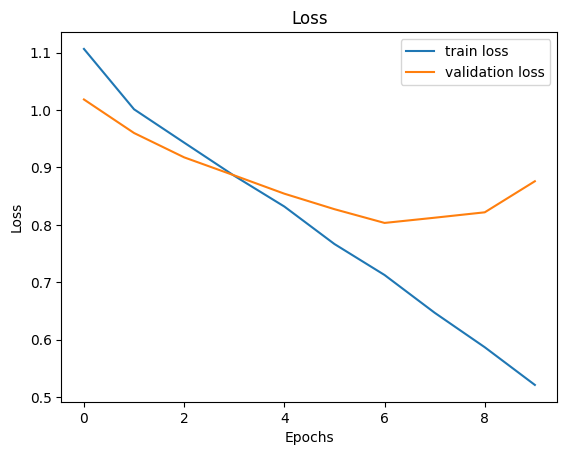

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


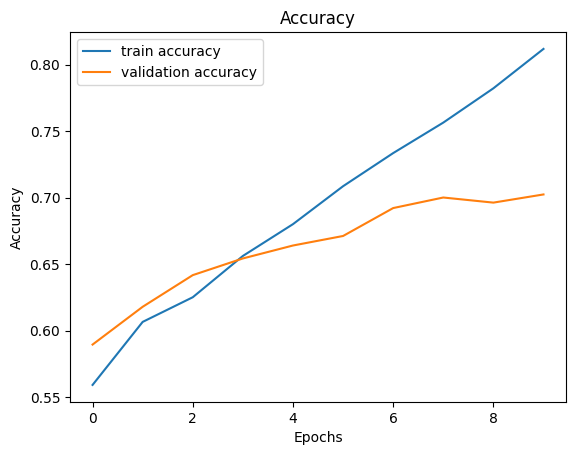

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show();

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

123/123 [==============================] - 1s 6ms/step - loss: 0.8760 - accuracy: 0.7024
Test Loss: 0.8760408759117126
Test Accuracy: 0.7024053335189819


In [ ]:
# Generate predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

123/123 [==============================] - 1s 5ms/step


Confusion Matrix:
 [[1173   46  226   52]
 [ 127  236  113   18]
 [ 300   12 1244   39]
 [ 102    3  125   92]]


Text(0.5, 1.0, 'Confusion Matrix')

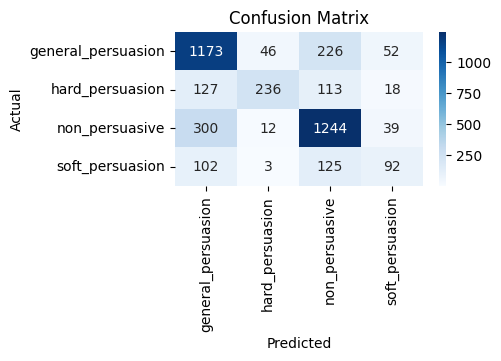

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Print confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", cm)
# Compute and plot confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_classes)
fig, ax = plt.subplots(figsize=(4,2))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d',
            xticklabels=train_data['category_name'].unique(),
            yticklabels=train_data['category_name'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')


In [ ]:
# Define the category names
category_names = train_data['category_name'].unique()

# Convert the category names to a list of strings
category_names = [str(category_name) for category_name in category_names]

In [ ]:
# Print classification report
print(classification_report(y_true, y_pred_classes,target_names=category_names))

                    precision    recall  f1-score   support

general_persuasion       0.69      0.78      0.73      1497
   hard_persuasion       0.79      0.48      0.60       494
    non_persuasive       0.73      0.78      0.75      1595
   soft_persuasion       0.46      0.29      0.35       322

          accuracy                           0.70      3908
         macro avg       0.67      0.58      0.61      3908
      weighted avg       0.70      0.70      0.69      3908

